## RIHAD VARIAWA
### 17-04-2019

In [0]:
class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
        
    def getX(self):
        return self.x
        
    def getY(self):
        return self.y
    
    def distFrom(self,other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [0]:
class Field(object):
    
    def __init__(self):
        self.drunks = {}

    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc

    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #Use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)


In [0]:
class Drunk(object):
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return 'This drunk is named ' + self.name

In [0]:
import random

In [0]:
class UsualDrunk(Drunk):
    
    def takeStep(self):
        stepChoices = [(0.0, 1.0),(0.0,-1.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

In [0]:
class ColdDrunk(Drunk):
    #This is a biased walk: moves more to the south than north
    def takeStep(self):
        stepChoices = [(0.0, 0.9),(0.0,-1.1),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

In [0]:
def walk(f, d, numSteps):
    """Assumes: f is a Field, d is a Drunk in f and numSteps is an int >= 0
    Moves d numSteps times; returns the distance between the final location 
    and the location at the start of the walk"""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [0]:
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an inte >= 0, numTrials an int > 0, dClass is a
    subclass of Drunk. The function simulates numTrials walks of numSteps
    steps each. Returns a list of the final distances for each trial"""
    Homer = dClass('a')
    origin = Location(0,0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

In [0]:
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths is a sequence of ints >= 0, numtrials is an 
    int > 0 and dClass is a subClass of Drunk. For each number of steps in 
    walkLengths, runs simWalks with numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of ', numSteps, ' steps')
        print('Mean = ',round(sum(distances)/len(distances),4))
        print('Max = ', max(distances),' Min = ',min(distances))
        print()

In [0]:
def simAll(drunkKinds, walkLengths, numTrials):
    """Assumes drunkKinds is a tuple of different types of drunks"""
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
        print()

#### random.seed(0)
#### drunkTest((10,100,1000,10000),100,UsualDrunk)
#### simAll((UsualDrunk,ColdDrunk),(10,100,1000,10000),100)

In [0]:
class styleIterator(object):
    
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
        
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

In [0]:
import pylab

In [0]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simualtion of', numSteps, walkLengths)
        trials = simWalks(numSteps,numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

In [0]:
#Reemplazo simAll por una funcion que grafique
def simAll(drunkKinds, walkLengths, numTrials):
    """Assumes drunkKinds is a tuple of different types of drunks"""
    styleChoice = styleIterator(('m-','b--','g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of ', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle, label = dClass.__name__)
    pylab.title('Mean distance from origin ('+str(numTrials)+' trials')
    pylab.xlabel('Number of steps')
    pylab.ylabel('Distance from origin')
    pylab.legend(loc= 'best')

#### random.seed(0)
#### numSteps = (10,100,1000,10000)
#### simAll((UsualDrunk,ColdDrunk),numSteps, 100)

In [0]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass('a')
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0,0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

In [0]:
def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+','r^','mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, label = dClass.__name__ + ' mean abs dist = < ' + str(meanX) + ', ' +str(meanY) + '>')
    pylab.title('Location at End of Walks ('+str(numSteps)+' steps)')
    pylab.ylim(-1000,1000)
    pylab.xlim(-1000,1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/Soth of Origin')
    pylab.legend(loc = 'upper left')


#### random.seed(0)
#### plotLocs((UsualDrunk, ColdDrunk), 100000,1000)

In [0]:
class OddField(Field):
    
    def __init__(self, numHoles = 1000, xRange = 100,yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x,y)] = newLoc

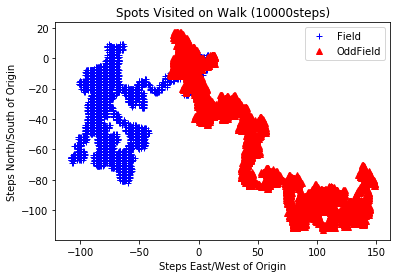

In [0]:
def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(('b+','r^','ko'))
    for fClass in fieldKinds:
        d = UsualDrunk('a')
        f = fClass()
        f.addDrunk(d, Location(0,0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals,yVals, curStyle, label = fClass.__name__)
        pylab.title('Spots Visited on Walk ('+ str(numSteps) + 'steps)')
        pylab.xlabel('Steps East/West of Origin')
        pylab.ylabel('Steps North/South of Origin')
        pylab.legend(loc = 'best')

traceWalk((Field,OddField),10000)